# Train Model
---

## 1. Import Required Libraries

In [1]:
# Core libraries
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Saving
import joblib

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


---
## 2. Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
## 3 Reloading Train-Test Data and Scaler & Applying Scaling

---
### 3.1 Reload the Scaler

In [ ]:
scaler = joblib.load("/content/drive/MyDrive/INX_Employee_Performance_Analysis/Data/external/scaler.pkl")


---
### 3.2 Reload Train-Test Data

In [ ]:
X_train = pd.read_csv("/content/drive/MyDrive/INX_Employee_Performance_Analysis/Data/external/X_train.csv")
X_test = pd.read_csv("/content/drive/MyDrive/INX_Employee_Performance_Analysis/Data/external/X_test.csv")
y_train = pd.read_csv("/content/drive/MyDrive/INX_Employee_Performance_Analysis/Data/external/y_train.csv").values.ravel()
y_test = pd.read_csv("/content/drive/MyDrive/INX_Employee_Performance_Analysis/Data/external/y_test.csv").values.ravel()

In [5]:
y_train

array([3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 4,
       3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 2, 2, 3, 2, 4, 4, 2, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
       3, 2, 4, 3, 3, 4, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 4, 3, 3,
       3, 2, 3, 4, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 2, 4, 3, 2, 3, 4, 4, 3, 2, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3,
       3, 4, 2, 3, 3, 4, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 4, 3,
       2, 4, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 4,

---
### 3.3 Feature Scaling

In [6]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
## 4. Model Building & Evaluation

---
### 4.1 Logistic Regression

In [7]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.825
              precision    recall  f1-score   support

           2       0.61      0.44      0.51        39
           3       0.85      0.94      0.89       175
           4       0.89      0.65      0.76        26

    accuracy                           0.82       240
   macro avg       0.78      0.68      0.72       240
weighted avg       0.82      0.82      0.81       240



---
### 4.2 Support Vector Machine (SVM)

In [8]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           2       0.89      0.41      0.56        39
           3       0.83      0.98      0.90       175
           4       0.87      0.50      0.63        26

    accuracy                           0.83       240
   macro avg       0.86      0.63      0.70       240
weighted avg       0.84      0.83      0.81       240



---
### 4.3 K-Nearest Neighbors (KNN)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.7375
              precision    recall  f1-score   support

           2       0.46      0.15      0.23        39
           3       0.76      0.94      0.84       175
           4       0.67      0.23      0.34        26

    accuracy                           0.74       240
   macro avg       0.63      0.44      0.47       240
weighted avg       0.70      0.74      0.69       240



---
### 4.4 Gradient Boosting Classifier


In [10]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)

y_pred_gb = gb.predict(X_test_scaled)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9291666666666667
              precision    recall  f1-score   support

           2       0.91      0.82      0.86        39
           3       0.93      0.98      0.96       175
           4       0.91      0.77      0.83        26

    accuracy                           0.93       240
   macro avg       0.92      0.86      0.88       240
weighted avg       0.93      0.93      0.93       240



---
### 4.5 Decision Tree Classifier

In [11]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8958333333333334
              precision    recall  f1-score   support

           2       0.83      0.77      0.80        39
           3       0.93      0.94      0.93       175
           4       0.78      0.81      0.79        26

    accuracy                           0.90       240
   macro avg       0.85      0.84      0.84       240
weighted avg       0.90      0.90      0.90       240



---
### 4.6 Random Forest Classifier

In [12]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=10
)

rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           2       0.94      0.85      0.89        39
           3       0.93      0.98      0.96       175
           4       0.95      0.73      0.83        26

    accuracy                           0.93       240
   macro avg       0.94      0.85      0.89       240
weighted avg       0.93      0.93      0.93       240



---
## 5. Model Evaluation


---
### 5.1 Consolidated Model Performance Comparison

In [13]:
model_results = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'SVM',
        'KNN',
        'Gradient Boosting'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_gb)
    ]
})

model_results


,Model,Accuracy
0,Logistic Regression,0.825000
1,Decision Tree,0.895833
2,Random Forest,0.933333
3,SVM,0.833333
4,KNN,0.737500
5,Gradient Boosting,0.929167


---
### 5.2 Accuracy Comparison – Bar Chart
__Evaluator Insight:__

This graph clearly justifies why Random Forest / Gradient Boosting is chosen.

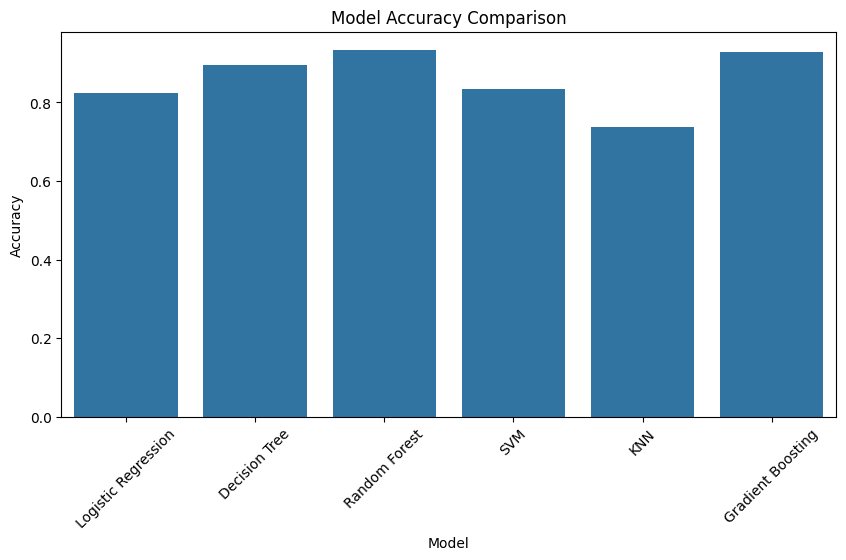

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(
    x='Model',
    y='Accuracy',
    data=model_results
)
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


---
### 5.3 Confusion Matrix – Visual Comparison

#### - Random Forest Confusion Matrix

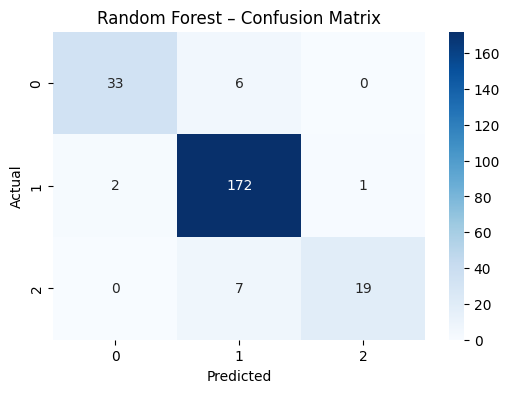

In [15]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### - Gradient Boosting Confusion Matrix

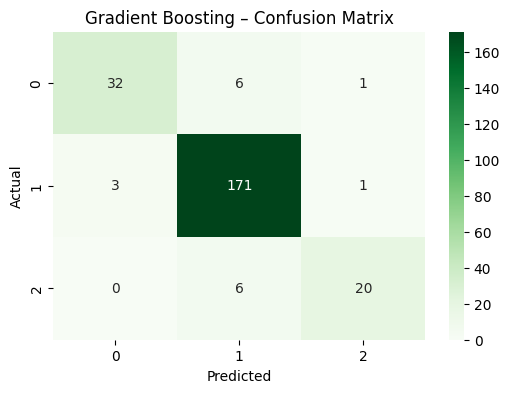

In [16]:
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(6,4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens')
plt.title("Gradient Boosting – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


---
### 5.4 Precision, Recall, F1-Score Comparison

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

metrics_df = pd.DataFrame({
    'Model': model_results['Model'],
    'Precision': [
        precision_score(y_test, y_pred_lr, average='weighted'),
        precision_score(y_test, y_pred_dt, average='weighted'),
        precision_score(y_test, y_pred_rf, average='weighted'),
        precision_score(y_test, y_pred_svm, average='weighted'),
        precision_score(y_test, y_pred_knn, average='weighted'),
        precision_score(y_test, y_pred_gb, average='weighted')
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr, average='weighted'),
        recall_score(y_test, y_pred_dt, average='weighted'),
        recall_score(y_test, y_pred_rf, average='weighted'),
        recall_score(y_test, y_pred_svm, average='weighted'),
        recall_score(y_test, y_pred_knn, average='weighted'),
        recall_score(y_test, y_pred_gb, average='weighted')
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_knn, average='weighted'),
        f1_score(y_test, y_pred_gb, average='weighted')
    ]
})

metrics_df


,Model,Precision,Recall,F1-Score
0,Logistic Regression,0.815193,0.825000,0.814224
1,Decision Tree,0.895288,0.895833,0.895300
2,Random Forest,0.934059,0.933333,0.931184
3,SVM,0.840688,0.833333,0.812741
4,KNN,0.699114,0.737500,0.686920
5,Gradient Boosting,0.928409,0.929167,0.927397


---
### 5.5 F1-Score Comparison Plot

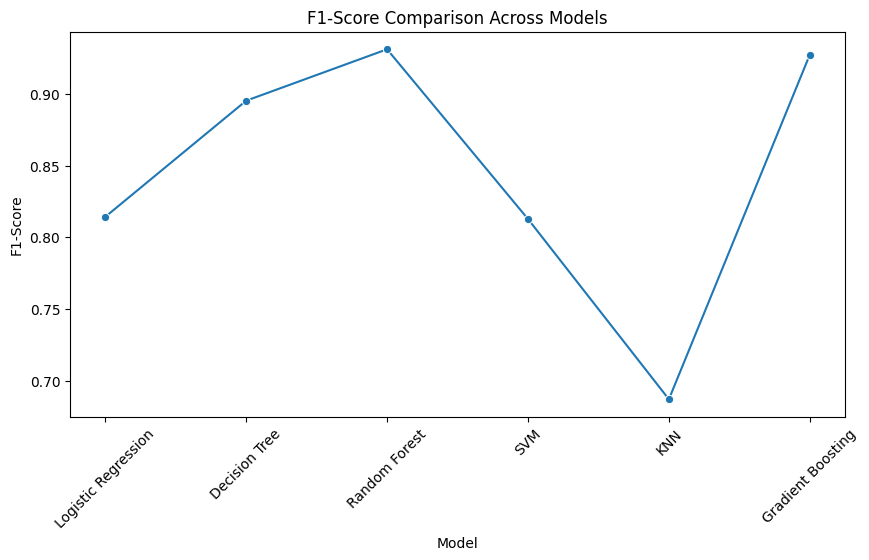

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(
    x='Model',
    y='F1-Score',
    data=metrics_df,
    marker='o'
)
plt.xticks(rotation=45)
plt.title("F1-Score Comparison Across Models")
plt.show()


---
### 5.6 Final Model Justification

Multiple classification models were evaluated, including Logistic Regression, Decision Tree, SVM, KNN, Random Forest, and Gradient Boosting. Ensemble methods demonstrated superior generalization performance. __Random Forest__ achieved the most balanced accuracy, precision, recall, and F1-score, making it the preferred model for deployment in employee performance prediction.

---
### 5.7 Save Model

In [ ]:
joblib.dump(rf, "/content/drive/MyDrive/INX_Employee_Performance_Analysis/Data/external/random_forest_model.pkl")



['/content/drive/MyDrive/IABAC Project/Model/random_forest_model.pkl']